# Time series
Svensk version | [Front page](../index_en.html)

In this guide we will cover basic time series commands. Time series are data where one observation is measured repeatedly over time.

Such data can be analyzed by just entering it into Stata as usual, using regular commands. But we can do more. With the special time series commands we can examine change, and how observations at different times relate to each other.

The data we will use in this post is on stocks: the daily closing value of the american Dow Jones Index, from April 2019 to APril 2020. [Download the data here.](../data/stocks.dta) The code below loads the data and shows the first ten rows:

In [1]:
use "../data/stocks.dta", clear
list in 1/10




     +---------------------------------+
     |      date   dowjo~se   dowjo~me |
     |---------------------------------|
  1. | 29apr2019    26554.4    2.8e+08 |
  2. | 30apr2019    26592.9    3.4e+08 |
  3. | 01may2019    26430.1    3.0e+08 |
  4. | 02may2019    26307.8    2.9e+08 |
  5. | 03may2019    26504.9    2.5e+08 |
     |---------------------------------|
  6. | 06may2019    26438.5    2.8e+08 |
  7. | 07may2019    25965.1    3.3e+08 |
  8. | 08may2019    25967.3    2.8e+08 |
  9. | 09may2019    25828.4    3.3e+08 |
 10. | 10may2019    25942.4    2.9e+08 |
     +---------------------------------+


## Set the time series with `tsset`
When working with time series we need a variable that shows the time, that is, in which order the observations are, and the intervals between them.

The data has three variables: date, dowjones_close and dowjones_volume. The date variable is our time variable. It is formatted according to Stata's principle for date variables, which means that Stata understands that "April 20" is one day after "April 19" and a week after "April 13", for example. How to format the variables in this way will be covered in a separate post.

We do not need to have a time variable in the date format. We can also have a variable that simply shows a number in a sequence, like 1, 2, 3 and so on. But if the data is measured once a day it is of course makes most sense to have a time variable that shows the date.

We will now tell Stata which variable that shows the time. We do that with the command `tsset`. We simply write `tsset` followed by the variable that shows the time - in our case the variable "date".

In [2]:
tsset date

        time variable:  date, 29apr2019 to 28apr2020, but with gaps
                delta:  1 day


The output says that thet the variable runs from April 29 2019 to April 28 2020, but with some gaps. Most importantly, the stock exchange is closed during weekends, and they are therefore not included in the data.

The row "delta" shows how big "one step" is: a day. Normally this is determined automatically, but if we for instance only had one observation per week we could write `tsset date, delta(7)` to show that each "step" is one week. But we do not need to that here.

## Draw a line graph
Now we can draw the data in a line chart, to see how the index has developed over time. Since we have set the time variable we can use the special command `tsline`. We then write `tsline` and the name of the variable we want the plot, for instance the closing value:

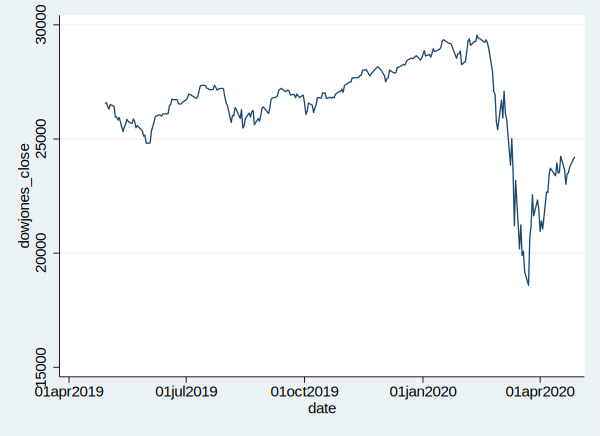

In [3]:
tsline dowjones_close

The March 2020 Corona pandemix makes a clear impression! The result is exactly the same as if we had used the regular twoway command, tht is `twoway (line dowjones_close date)` but this is slightly faster.

## Create various time variables (lags, leads, delta)
Here is the real advantage of time setting the data, the operators to create different variables that deal explicitly with time.

### Lagged variables
First we have the lagged variables. They show the value of a variable at previous points in time. They are useful (among other things) to determine what the relationship of the Dow Jones Index is to past values of itself. We can create them by using the prefix `l'.` in front of variables. If we write `l.dowjones_close` we get the value of the Dow Jones Index the previous day. If we write `l7.dowjones_close` we get the value seven days earlier, and so on. Any number can be inserted after the `l`.

As an example, we can create a correlation matrix that shows how each day's value correlates with the value the day before, a week prior, and two weeks prior:

In [5]:
corr dowjones_close l.dowjones_close l7.dowjones_close l14.dowjones_close

(obs=180)

             |                 L.      L7.     L14.
             | dowjo~se dowjo~se dowjo~se dowjo~se
-------------+------------------------------------
dowjones_c~e |
         --. |   1.0000
         L1. |   0.9752   1.0000
         L7. |   0.8791   0.8967   1.0000
        L14. |   0.7413   0.7574   0.8722   1.0000



The correlation between each day's index and the previous day's is very strong: 0.98. The correlation with the value a week earlier is lower (but still strong, 0.88) and even lower two weeks prior (0.74). Which is hardly surprising given that more can change in two weeks than in one.

We can also use these commands when drawing graphs. We will then shift the line to the right. In the graph below the blue line shows each day's closing value, and the red line what the same variable was, two weeks earlier.

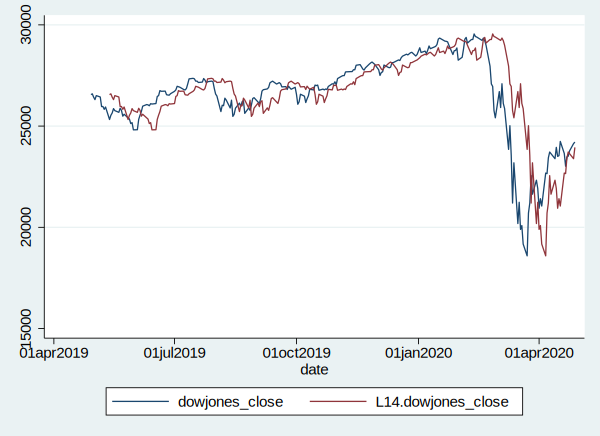

In [6]:
tsline dowjones_close l14.dowjones_close

### Leading variables
Leading variables are just the same as the lagged variables, but for the future. They show what the variable is, further ahead in time. The prefix we use here is `f.`. `f.dowjones_close` shows what the closing value of Dow Jones is the day after the current date, and `f14.dowjones_close` shows the value two weeks later.

In [9]:
corr dowjones_close f.dowjones_close f7.dowjones_close f14.dowjones_close

(obs=175)

             |                 F.      F7.     F14.
             | dowjo~se dowjo~se dowjo~se dowjo~se
-------------+------------------------------------
dowjones_c~e |
         --. |   1.0000
         F1. |   0.9735   1.0000
         F7. |   0.8792   0.8905   1.0000
        F14. |   0.7306   0.7602   0.8848   1.0000



### Delta variables (change variables)
Delta in this context signifies change. With the prefix `d.` we can see how the value has changed since the previous period - in this case the day before. It is here important to remember that we are talking about a change of one day (since we said earlier that one step is one day). Mondays are therefore compared with Sundays (when the exchange is closed), not Fridays. Since there are no values on Sundays the Mondays are also excluded when looking at change this way.

Below we can see how the Dow Jones Index has change from day to day, over time:

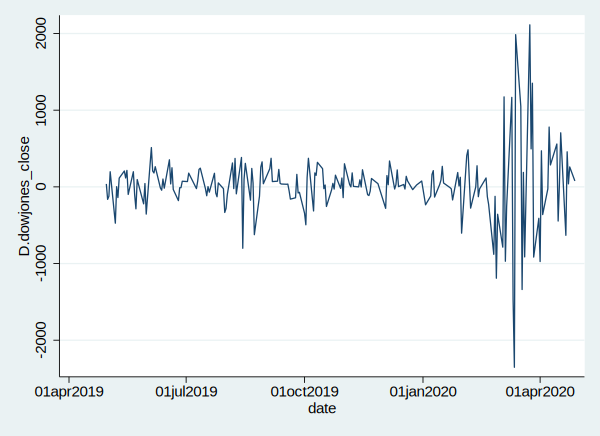

In [10]:
tsline d.dowjones_close

Up and down, with extreme fluctuations during the Corona pandemic.

We can also lag change variables. If we for instance write `l.d.dowjones_close` we get the change from two days ago to one day ago. The graph below compares the change from "yesterday" to "today" (in relation to each observation in the data) with the change from the day before yesterday to yesterday. Below is a scatterplot with a fitted regression line:

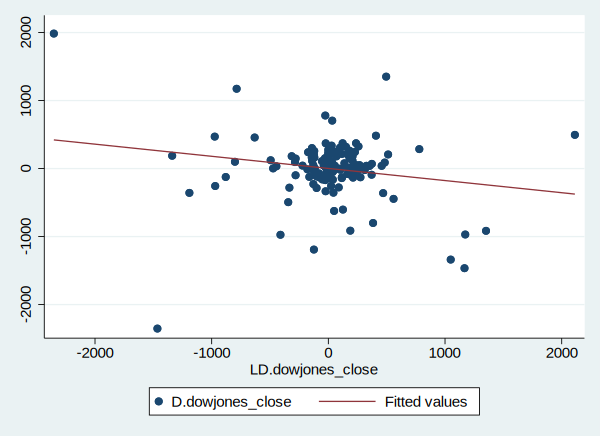

In [12]:
twoway (scatter d.dowjones_close l.d.dowjones_close) (lfit d.dowjones_close l.d.dowjones_close)

The relationship is not very strong, but the regression line slopes downwards. It means that days with big increases (those that are far to the right) tend to be followed by days of decreases. A regression to the mean. In the same way, big decreases are generally followed by increases.

The dot in the upper left corner is for instance March 13 2020. Between March 11 and 12 the Dow Jones Index dropped more than 2000 points. But between March 12 and 13 the index instead went up with 2000 points, and recouped the losses!

## Save the variables
Stata creates temporary variables when we use these operators. They can be used in the analyses, but are not visible in the dataset. If we want to save the variables we can do so. We then use the `generate`-command. For instance, in the code below we create two variables, that show the value of the Dow Jones Index the day before the current date, as well as the change from the day before.

In [13]:
gen l_dowjones_close = l.dowjones_close
gen d_dowjones_close = d.dowjones_close


(61 missing values generated)

(65 missing values generated)


The new variables can of course be named anything you like. Personally I like to use the same notation as in the time series operators, but with underscores instead of period marks. If we now look at the data again we can see that we have two new variables:

In [14]:
list in 1/10


     +--------------------------------------------------------+
     |      date   dowjo~se   dowjo~me   l_dowj~e   d_dowjo~e |
     |--------------------------------------------------------|
  1. | 29apr2019    26554.4    2.8e+08          .           . |
  2. | 30apr2019    26592.9    3.4e+08   26554.39    38.51953 |
  3. | 01may2019    26430.1    3.0e+08   26592.91   -162.7695 |
  4. | 02may2019    26307.8    2.9e+08   26430.14   -122.3516 |
  5. | 03may2019    26504.9    2.5e+08   26307.79    197.1602 |
     |--------------------------------------------------------|
  6. | 06may2019    26438.5    2.8e+08          .           . |
  7. | 07may2019    25965.1    3.3e+08   26438.48   -473.3906 |
  8. | 08may2019    25967.3    2.8e+08   25965.09    2.240234 |
  9. | 09may2019    25828.4    3.3e+08   25967.33   -138.9707 |
 10. | 10may2019    25942.4    2.9e+08   25828.36    114.0098 |
     +--------------------------------------------------------+


The data match: April 30 th value of l_dowjones_close is 26554.39, the same as the value of dowjones_close the day before.

## Conclusions
This was a very basic introduction to time setting data, and the basic operators. Type `help tsvarlist` for an exhaustive list of the operators you can use. To analyze the data with regression analysis and similar techniques requires some special considerations, which we will have to cover in another post.

Here, we only had one time series. Often we have data over time, but on several units. We then call that data panel data, and requires a slightly different setup. The time series operators `l.`, `f.` och `d.` however still work even with panel data.